<a href="https://colab.research.google.com/github/AzamBukhari/FAST_AI_Qucikie/blob/main/fastAI_page1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Computer vision classification: Cats vs dogs
> You can use **fastai** without any installation by using Google Colab. 

> **Tip:** Be sure to change the Colab runtime to “GPU” to have it run fast! 

> You can install fastai on your own machines with conda (highly recommended), as long as you’re running Linux or Windows (NB: Mac is not supported).

In [2]:
%%capture
!pip  install nbdev

### Observe how few imports are here. They provide me all the functionality of pytorch & numpy

In [3]:
#import libraries
from fastai.vision.all import *
from fastai.collab import *
import fastai
# libraries for file formating & documentation
import nbdev
import PIL

fastai’s use the same basic steps and code:

- Create appropriate DataLoaders
- Create a Learner
- Call a fit method
- Make predictions or view results.

In [19]:
path = untar_data(URLs.PETS)

In [25]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [22]:
files = get_image_files(path/"images")
len(files)

7390

In [29]:
files[0], files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_129.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_172.jpg'))

> The code below does the following things:

1. A dataset called the Oxford-IIIT Pet Dataset that contains 7,349 images of cats and dogs from 37 different breeds will be downloaded from the fast.ai datasets collection to the GPU server you are using, and will then be extracted.
2. A pretrained model that has already been trained on 1.3 million images, using a competition-winning model will be downloaded from the internet.
3. The pretrained model will be fine-tuned using the latest advances in transfer learning, to create a model that is specially customized for recognizing dogs and cats.

The first two steps only need to be run once. If you run it again, it will use the dataset and model that have already been downloaded, rather than downloading them again.

In [35]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, files, label_func=is_cat, item_tfms=Resize(224))




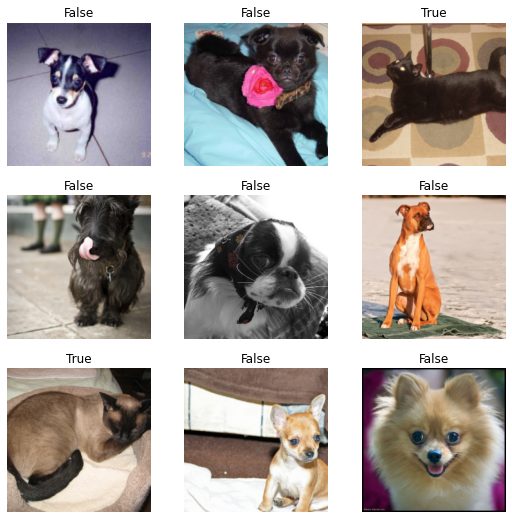

In [36]:
dls.show_batch()
# Check if everything looks okay with the show_batch method (True is for cat, False is for dog):

Create a Learner, which is a fastai object that combines the data and a model for training, and uses transfer learning to fine tune a pretrained model in just two lines of code

In [38]:
# Utilise a model RestNet34 pretrained on our imageset
learn = vision_learner(dls, resnet34, metrics=[accuracy])
learn.fine_tune(1)
#It fine tunes with only two iterations achieving accuracy of 99.59%

epoch,train_loss,valid_loss,accuracy,time
0,0.161699,0.023719,0.992558,00:52


epoch,train_loss,valid_loss,accuracy,time
0,0.056594,0.018857,0.993911,00:57


## Prediction

In [42]:
learn.predict(files[7123])


('True', TensorBase(1), TensorBase([1.1415e-07, 1.0000e+00]))

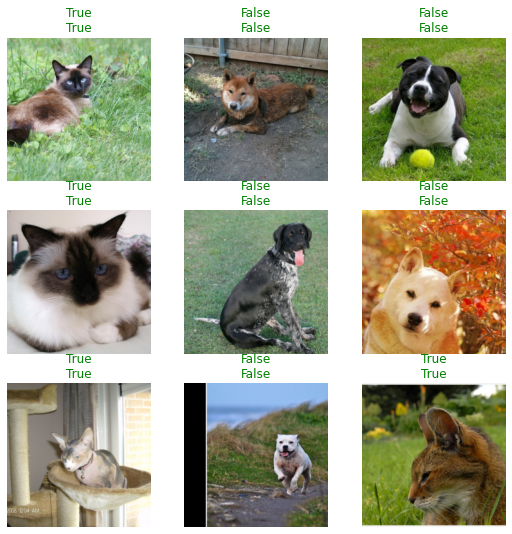

In [43]:
learn.show_results()